In [4]:
import os
import pandas as pd

# Define simulation names
simulation_names = ['SEP1', 'SEP2', 'SEP3M', 'SEP3H', 'SEP4', 'SEP5H', 'SEP5M', 'SEP6H', 'SEP6M']

# Initialize dictionary to hold data
scenario_data = {}

# Load CSVs for each scenario
for sim in simulation_names:
    sim_path = os.path.join("..", "figures", sim)
    
    # Define expected CSV paths
    pop_time_path = os.path.join(sim_path, "pop_time.csv")
    pop_time_alt_path = os.path.join(sim_path, "pop_time_alt.csv")
    pop_snapshots_path = os.path.join(sim_path, "pop_snapshots.csv")
    coll_pair_path = os.path.join(sim_path, "pairwise_collisions_time_alt.csv")
    density_snapshots_path = os.path.join(sim_path, "snapshot_density_altitude.csv")
    launch_profile_path = os.path.join(sim_path, "yearly_launch_counts.csv")
    
    # Load each CSV if it exists
    pop_time_df = pd.read_csv(pop_time_path) if os.path.exists(pop_time_path) else None
    pop_time_alt_df = pd.read_csv(pop_time_alt_path) if os.path.exists(pop_time_alt_path) else None
    pop_snapshots_df = pd.read_csv(pop_snapshots_path) if os.path.exists(pop_snapshots_path) else None
    coll_pair_df = pd.read_csv(coll_pair_path) if os.path.exists(coll_pair_path) else None
    density_snapshots_df = pd.read_csv(density_snapshots_path) if os.path.exists(density_snapshots_path) else None
    launch_profile_df = pd.read_csv(launch_profile_path) if os.path.exists(launch_profile_path) else None

    # Store in dictionary under scenario name
    scenario_data[sim] = {
        "pop_time": pop_time_df,
        "pop_time_alt": pop_time_alt_df,
        "pop_snapshots": pop_snapshots_df,
        "pairwise_collisions": coll_pair_df,
        "density_snapshots": density_snapshots_df,
        "launch_profile": launch_profile_df
    }

    print(f"✅ Loaded data for {sim}: " +
          f"{'pop_time.csv ' if pop_time_df is not None else ''}" +
          f"{'pop_time_alt.csv ' if pop_time_alt_df is not None else ''}" +
          f"{'pop_snapshots.csv ' if pop_snapshots_df is not None else ''}" +
          f"{'pairwise_collisions_time_alt.csv ' if coll_pair_df is not None else ''}" +
          f"{'snapshot_density_altitude.csv ' if density_snapshots_df is not None else ''}" +
          f"{'yearly_launch_counts.csv' if launch_profile_df is not None else ''}")

✅ Loaded data for SEP1: pop_time.csv pop_time_alt.csv pop_snapshots.csv pairwise_collisions_time_alt.csv snapshot_density_altitude.csv 
✅ Loaded data for SEP2: pop_time.csv pop_time_alt.csv pop_snapshots.csv pairwise_collisions_time_alt.csv snapshot_density_altitude.csv yearly_launch_counts.csv
✅ Loaded data for SEP3M: pop_time.csv pop_time_alt.csv pop_snapshots.csv pairwise_collisions_time_alt.csv snapshot_density_altitude.csv 
✅ Loaded data for SEP3H: pop_time.csv pop_time_alt.csv pop_snapshots.csv pairwise_collisions_time_alt.csv snapshot_density_altitude.csv 
✅ Loaded data for SEP4: pop_time.csv pop_time_alt.csv pop_snapshots.csv pairwise_collisions_time_alt.csv snapshot_density_altitude.csv 
✅ Loaded data for SEP5H: pop_time.csv pop_time_alt.csv pop_snapshots.csv pairwise_collisions_time_alt.csv snapshot_density_altitude.csv 
✅ Loaded data for SEP5M: pop_time.csv pop_time_alt.csv pop_snapshots.csv pairwise_collisions_time_alt.csv snapshot_density_altitude.csv 
✅ Loaded data for SE

In [7]:
import numpy as np
import matplotlib.pyplot as plt

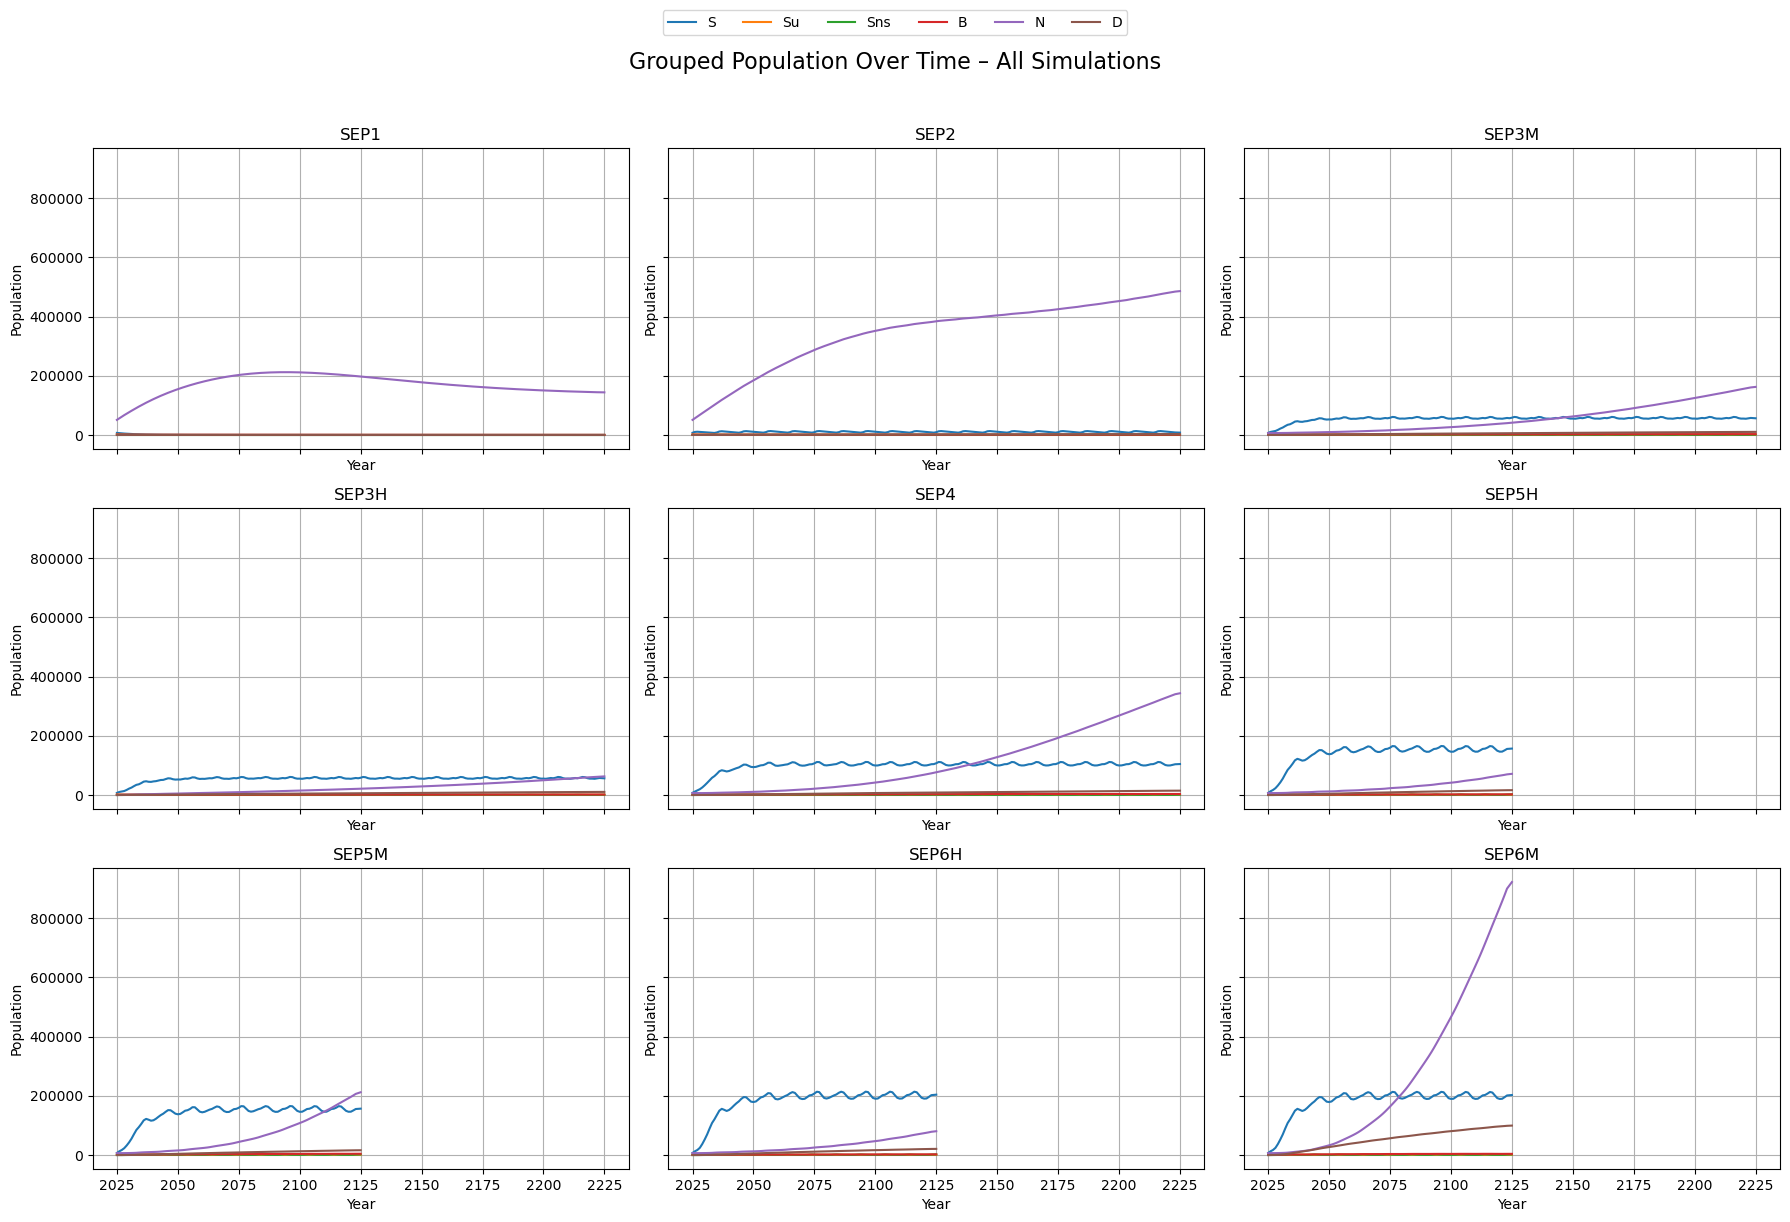

In [8]:
n_cols = 3
n_rows = int(np.ceil(len(simulation_names) / n_cols))

# --- CREATE FIGURE ---
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True, sharey=True)
axs = axs.flatten()

# --- PLOT EACH SIMULATION ---
for i, sim in enumerate(simulation_names):
    ax = axs[i]
    df = scenario_data[sim]["pop_time"]

    if df is None:
        ax.set_title(f"{sim} (Missing Data)")
        ax.axis("off")
        continue

    # Pivot by species
    grouped = df.pivot(index="Year", columns="Species", values="Population").fillna(0)

    for species in ['S', 'Su', 'Sns', 'B', 'N', 'D']:
        if species in grouped.columns:
            ax.plot(grouped.index, grouped[species], label=species)

    ax.set_title(sim)
    ax.grid(True)

# --- FINAL TOUCHES ---
for ax in axs:
    ax.set_xlabel("Year")
    ax.set_ylabel("Population")

# Remove any unused subplots
for j in range(len(simulation_names), len(axs)):
    axs[j].axis("off")

# Place legend outside
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.02))

plt.suptitle("Grouped Population Over Time – All Simulations", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

▶ Plotting heatmap for species: S


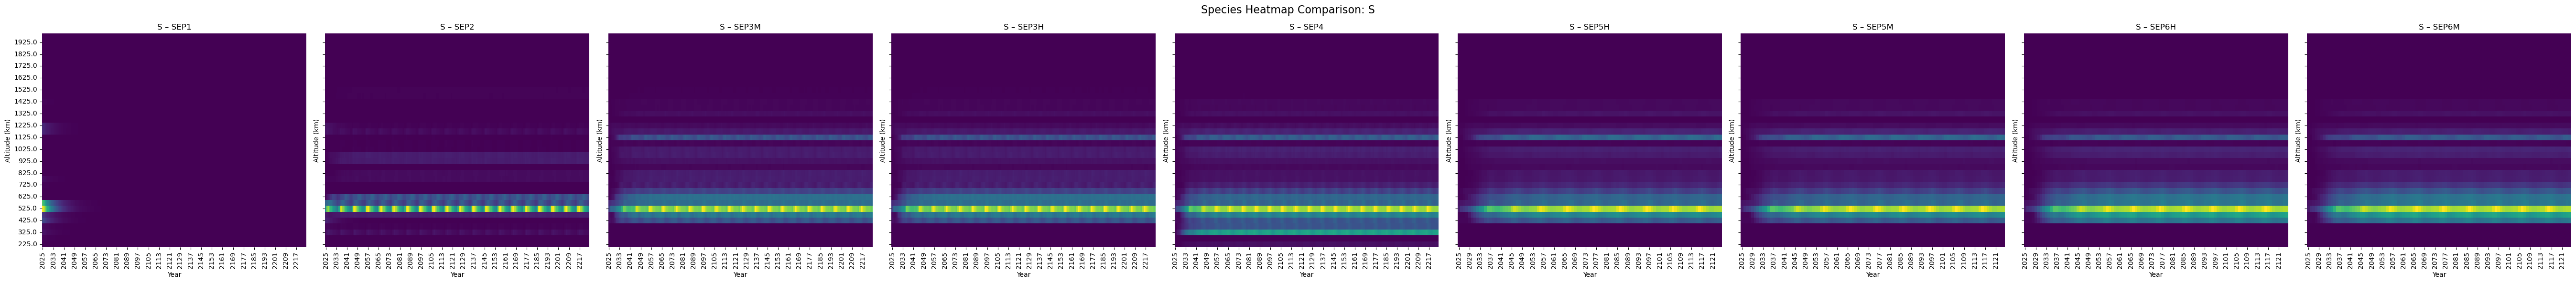

✅ Saved heatmap comparison to: multi_scenario_heatmaps/S_compare_heatmap.png
▶ Plotting heatmap for species: Su


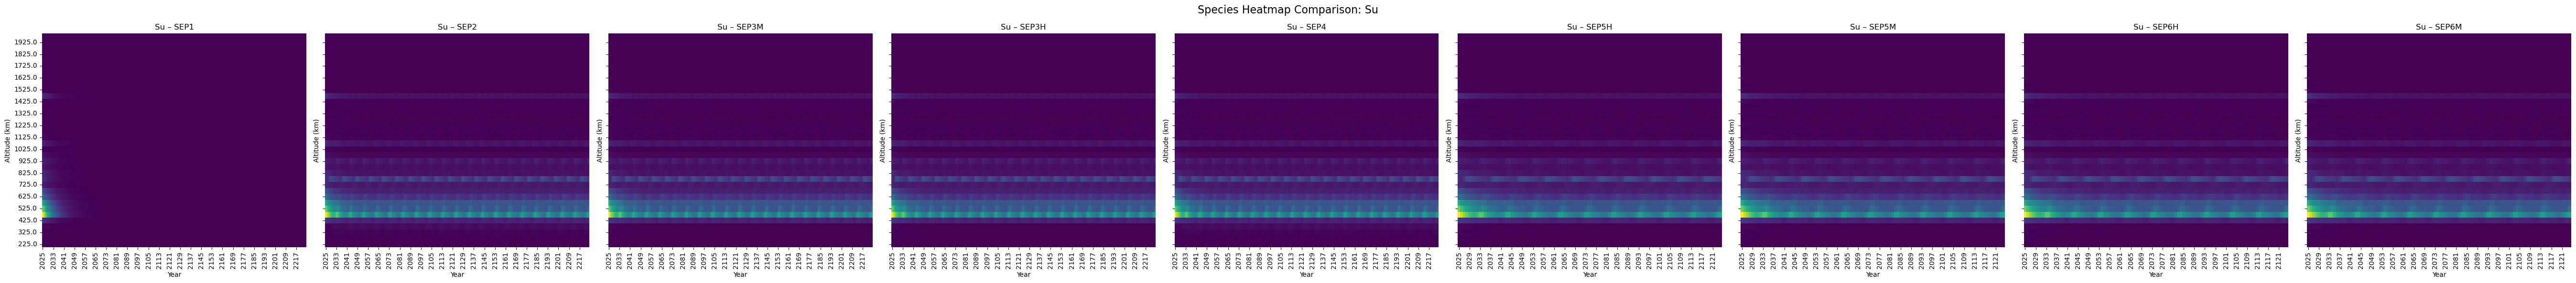

✅ Saved heatmap comparison to: multi_scenario_heatmaps/Su_compare_heatmap.png
▶ Plotting heatmap for species: Sns


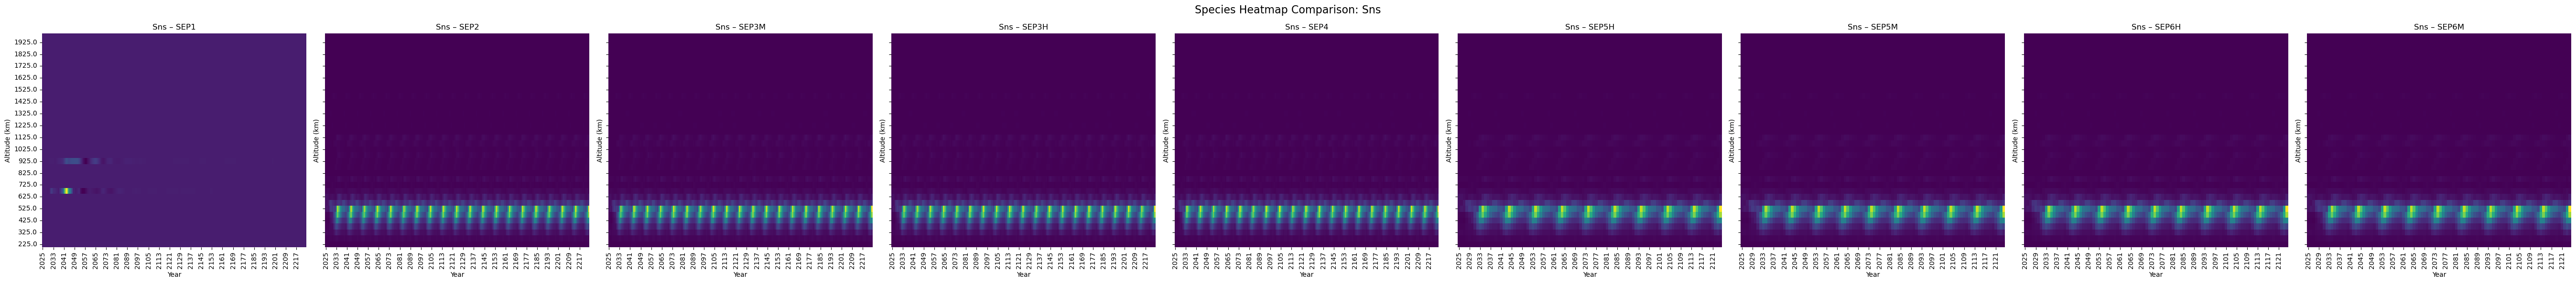

✅ Saved heatmap comparison to: multi_scenario_heatmaps/Sns_compare_heatmap.png
▶ Plotting heatmap for species: N


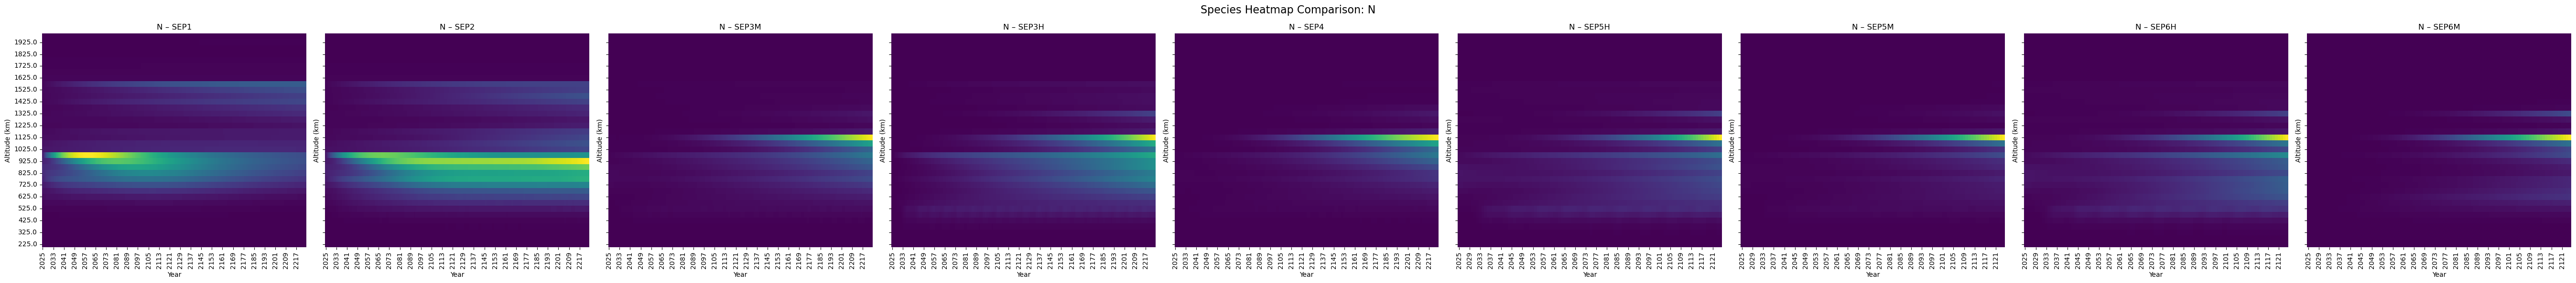

✅ Saved heatmap comparison to: multi_scenario_heatmaps/N_compare_heatmap.png
▶ Plotting heatmap for species: B


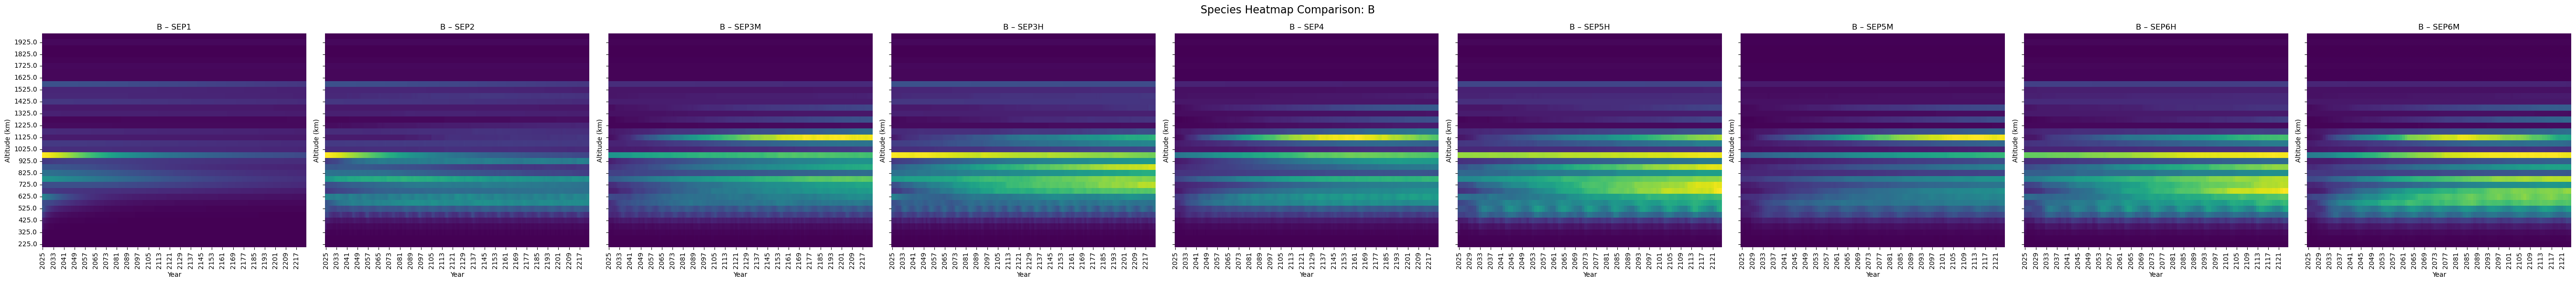

✅ Saved heatmap comparison to: multi_scenario_heatmaps/B_compare_heatmap.png
▶ Plotting heatmap for species: D


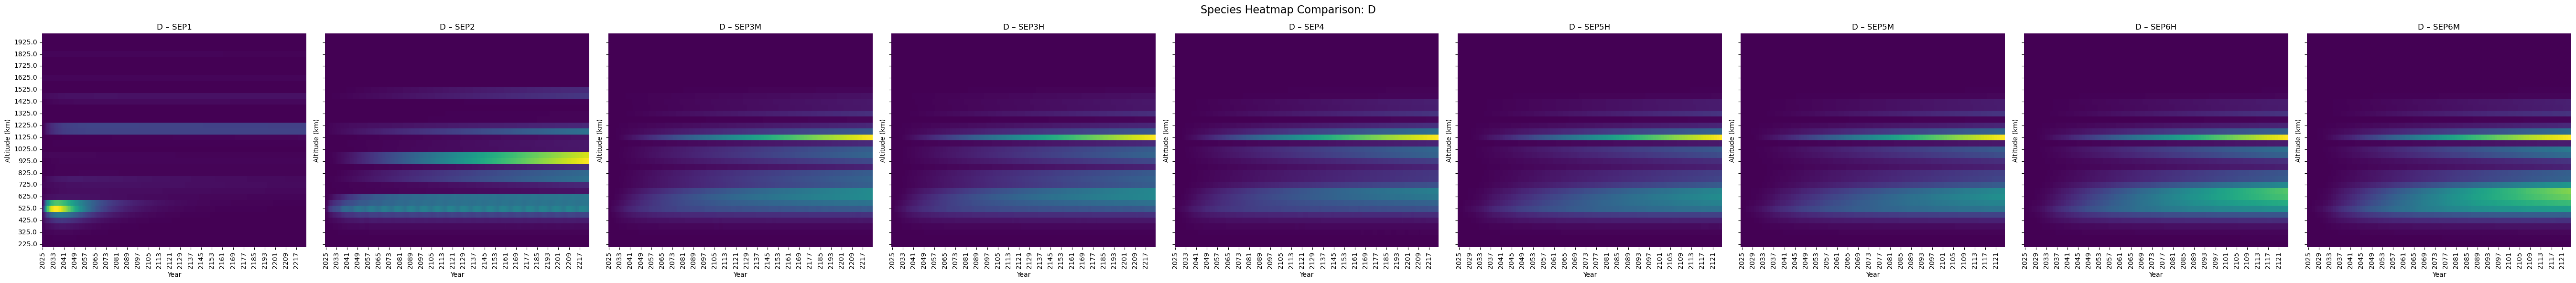

✅ Saved heatmap comparison to: multi_scenario_heatmaps/D_compare_heatmap.png


In [10]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Settings ---
species_of_interest = ['S', 'Su', 'Sns', 'N', 'B', 'D']
output_dir = "multi_scenario_heatmaps"
os.makedirs(output_dir, exist_ok=True)

# --- Load and collect data ---
all_scenario_alt_data = {}

for sim in simulation_names:
    file_path = os.path.join("..", "figures", sim, "pop_time_alt.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        all_scenario_alt_data[sim] = df
    else:
        print(f"❌ Missing: {sim}/pop_time_alt.csv")

# --- Process each species ---
for sp in species_of_interest:
    print(f"▶ Plotting heatmap for species: {sp}")

    # Collect data for current species from all scenarios
    heatmap_data = []

    for sim, df in all_scenario_alt_data.items():
        df_sp = df[df["Species"] == sp].copy()
        if df_sp.empty:
            continue
        df_sp["Scenario"] = sim
        heatmap_data.append(df_sp)

    if not heatmap_data:
        print(f"⚠ No data for species: {sp}")
        continue

    df_all = pd.concat(heatmap_data)

    # Pivot: Altitude vs Year for each Scenario
    pivot_dict = {}
    for sim in df_all["Scenario"].unique():
        df_sim = df_all[df_all["Scenario"] == sim]
        pivot = df_sim.pivot_table(index="Altitude", columns="Year", values="Population", aggfunc="sum", fill_value=0)
        pivot_dict[sim] = pivot

    # --- Plot combined heatmap figure ---
    n = len(pivot_dict)
    fig, axs = plt.subplots(1, n, figsize=(6*n, 6), sharey=True)

    if n == 1:
        axs = [axs]

    for ax, (sim, pivot) in zip(axs, pivot_dict.items()):
        sns.heatmap(pivot, cmap="viridis", ax=ax, cbar=False)
        ax.invert_yaxis()
        ax.set_title(f"{sp} – {sim}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Altitude (km)")

    fig.suptitle(f"Species Heatmap Comparison: {sp}", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)

    # Save the figure
    save_path = os.path.join(output_dir, f"{sp}_compare_heatmap.png")
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"✅ Saved heatmap comparison to: {save_path}")

▶ Generating surface plots for species: S


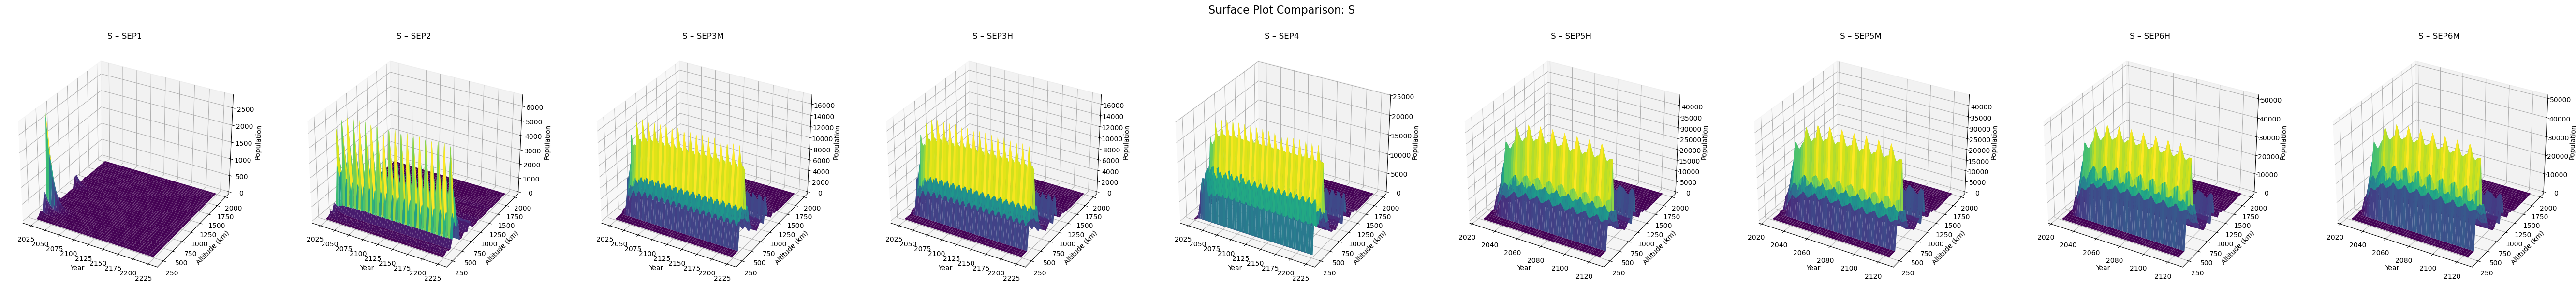

✅ Saved surface plot comparison to: multi_scenario_surfaceplots/S_surface_compare.png
▶ Generating surface plots for species: Su


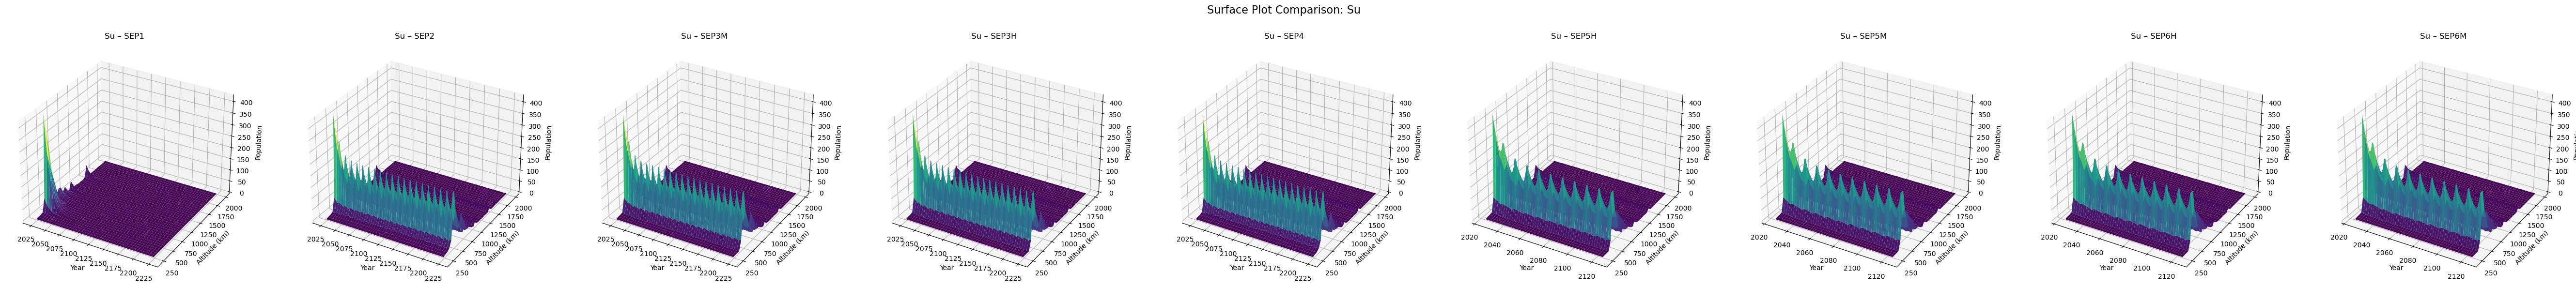

✅ Saved surface plot comparison to: multi_scenario_surfaceplots/Su_surface_compare.png
▶ Generating surface plots for species: Sns


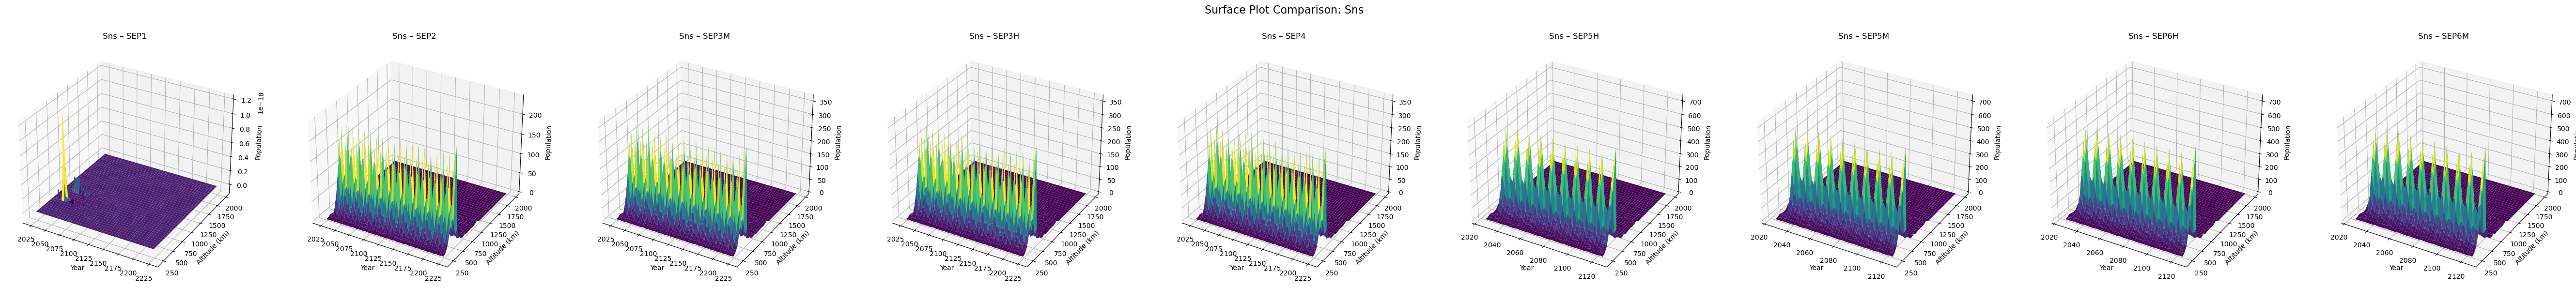

✅ Saved surface plot comparison to: multi_scenario_surfaceplots/Sns_surface_compare.png
▶ Generating surface plots for species: N


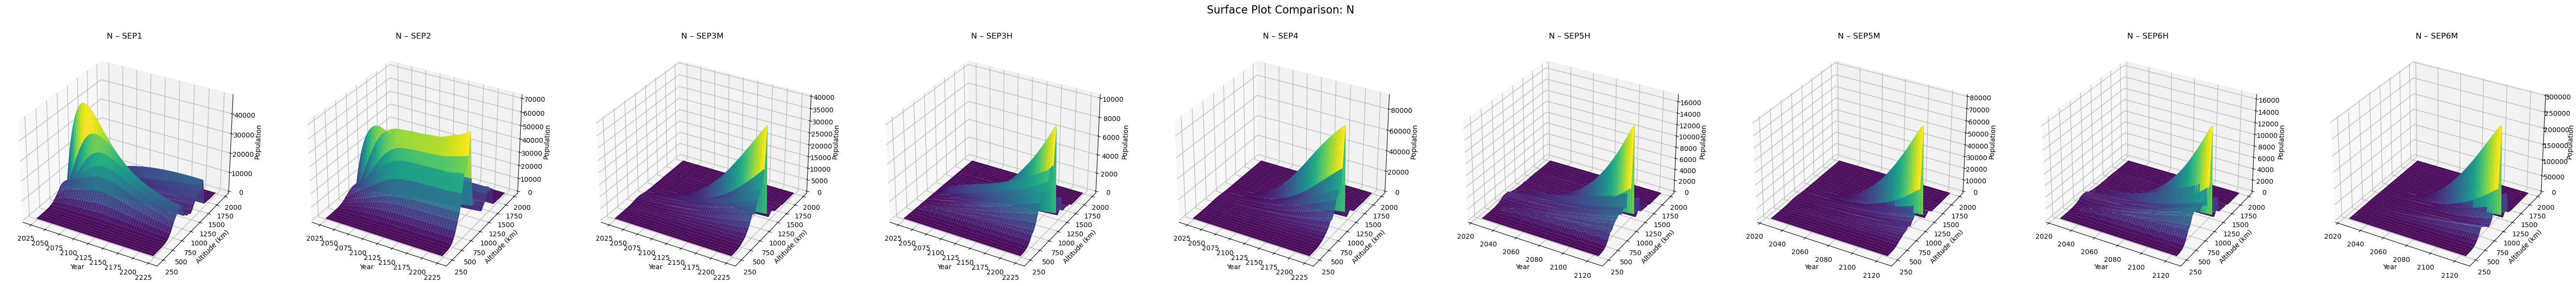

✅ Saved surface plot comparison to: multi_scenario_surfaceplots/N_surface_compare.png
▶ Generating surface plots for species: B


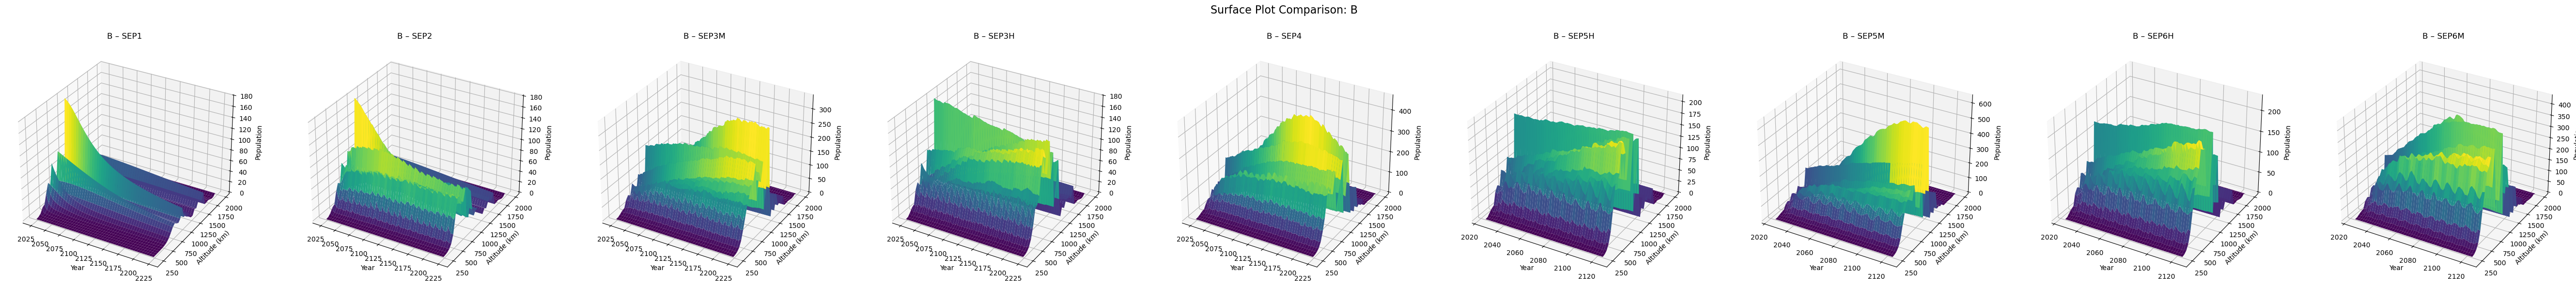

✅ Saved surface plot comparison to: multi_scenario_surfaceplots/B_surface_compare.png
▶ Generating surface plots for species: D


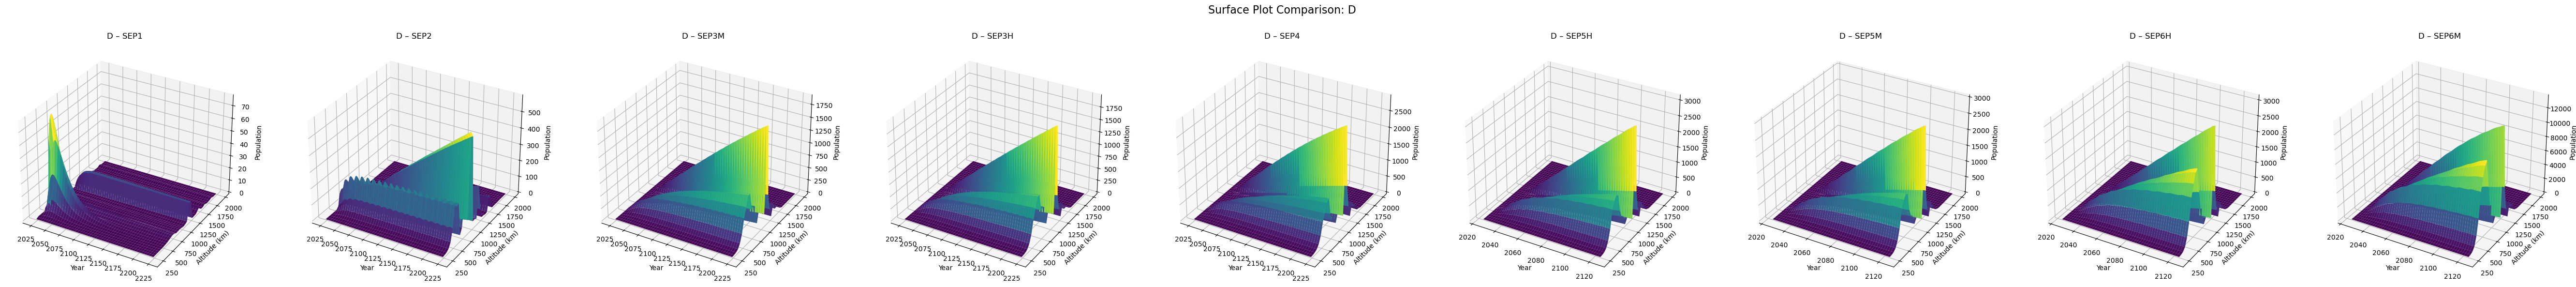

✅ Saved surface plot comparison to: multi_scenario_surfaceplots/D_surface_compare.png


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plotting)
import numpy as np

# --- Settings ---
species_of_interest = ['S', 'Su', 'Sns', 'N', 'B', 'D']
output_dir = "multi_scenario_surfaceplots"
os.makedirs(output_dir, exist_ok=True)

# --- Load and collect data ---
all_scenario_alt_data = {}

for sim in simulation_names:
    file_path = os.path.join("..", "figures", sim, "pop_time_alt.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        all_scenario_alt_data[sim] = df
    else:
        print(f"❌ Missing: {sim}/pop_time_alt.csv")

# --- Surface plot for each species ---
for sp in species_of_interest:
    print(f"▶ Generating surface plots for species: {sp}")

    # Get relevant data across scenarios
    pivot_dict = {}
    for sim, df in all_scenario_alt_data.items():
        df_sp = df[df["Species"] == sp]
        if df_sp.empty:
            continue
        pivot = df_sp.pivot_table(index="Altitude", columns="Year", values="Population", aggfunc="sum", fill_value=0)
        pivot_dict[sim] = pivot

    if not pivot_dict:
        print(f"⚠ No data available for species: {sp}")
        continue

    # --- Plot ---
    n = len(pivot_dict)
    fig = plt.figure(figsize=(6 * n, 6))

    for idx, (sim, pivot) in enumerate(pivot_dict.items()):
        ax = fig.add_subplot(1, n, idx + 1, projection='3d')

        X, Y = np.meshgrid(pivot.columns.values, pivot.index.values)
        Z = pivot.values

        ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(f"{sp} – {sim}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Altitude (km)")
        ax.set_zlabel("Population")

    fig.suptitle(f"Surface Plot Comparison: {sp}", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    # Save figure
    save_path = os.path.join(output_dir, f"{sp}_surface_compare.png")
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"✅ Saved surface plot comparison to: {save_path}")

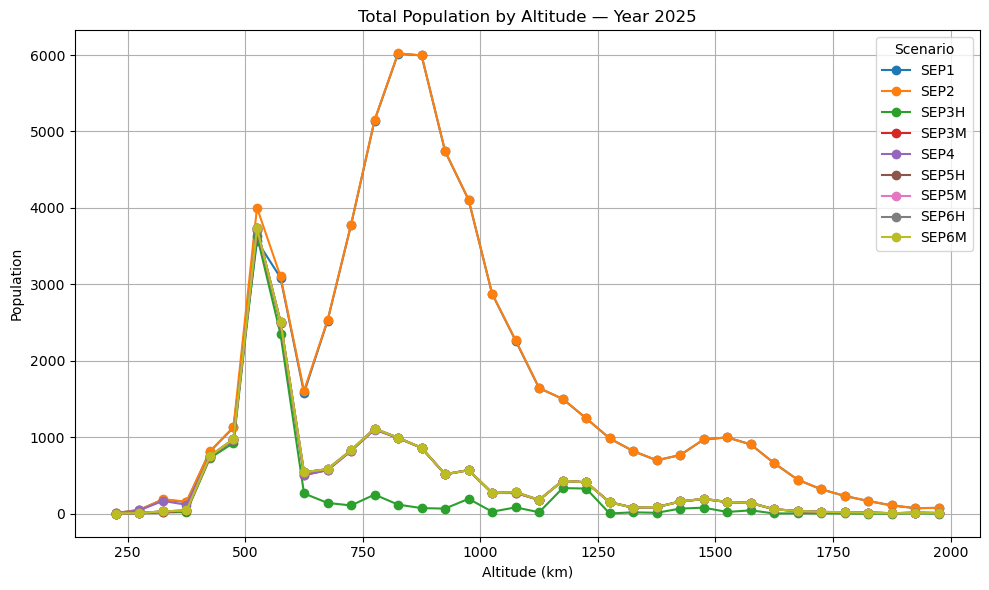

✅ Saved comparison plot for 2025 to multi_scenario_snapshots_altitude/compare_altitude_pop_2025.png


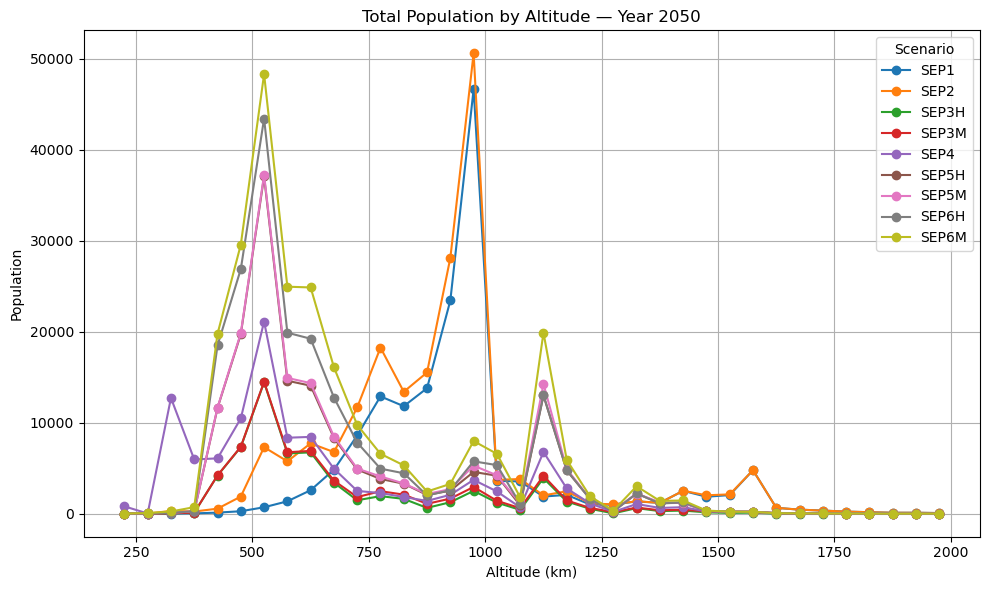

✅ Saved comparison plot for 2050 to multi_scenario_snapshots_altitude/compare_altitude_pop_2050.png


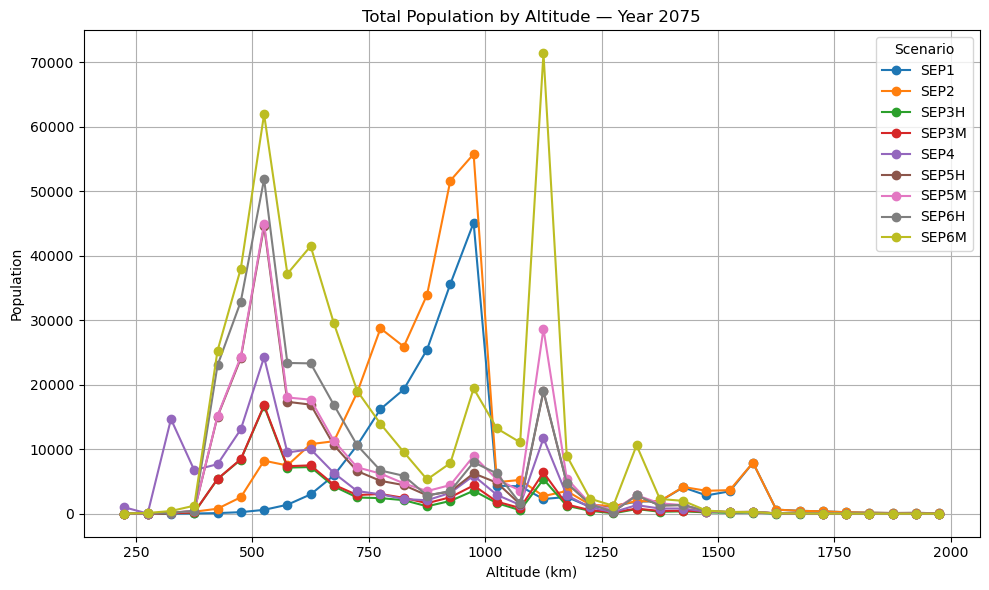

✅ Saved comparison plot for 2075 to multi_scenario_snapshots_altitude/compare_altitude_pop_2075.png


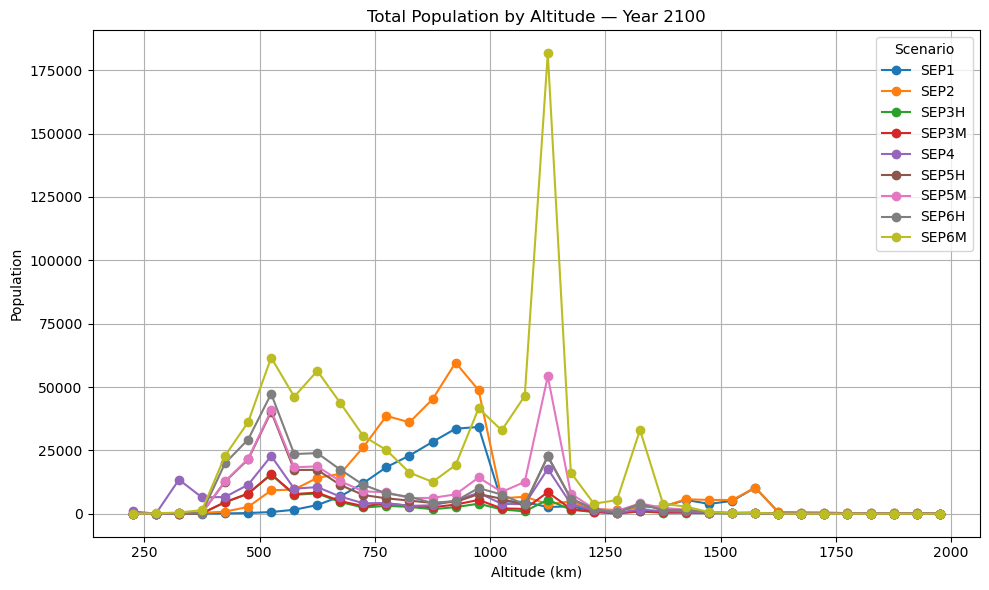

✅ Saved comparison plot for 2100 to multi_scenario_snapshots_altitude/compare_altitude_pop_2100.png


In [13]:
# === AGGREGATE ALL SNAPSHOT CSVs ===
all_snapshots = []

for sim in simulation_names:
    csv_path = os.path.join("..", "figures", sim, "snapshot_density_altitude.csv")
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df["Scenario"] = sim
        all_snapshots.append(df)
    else:
        print(f"⚠️ Missing: {csv_path}")

df_all = pd.concat(all_snapshots, ignore_index=True)

# === PLOT BY SCENARIO ===
plot_dir = "multi_scenario_snapshots_altitude"
os.makedirs(plot_dir, exist_ok=True)

snapshot_years = [2025, 2050, 2075, 2100]
for year in snapshot_years:
    plt.figure(figsize=(10, 6))
    df_year = df_all[df_all["Year"] == year]
    altitudes_sorted = sorted(df_year["Altitude"].unique())
    scenarios = sorted(df_year["Scenario"].unique())

    for scenario in scenarios:
        df_scenario = (
            df_year[df_year["Scenario"] == scenario]
            .groupby("Altitude", as_index=False)["Population"]
            .sum()
            .set_index("Altitude")
            .reindex(altitudes_sorted, fill_value=0)
            .reset_index()
        )

        plt.plot(
            df_scenario["Altitude"],
            df_scenario["Population"],
            label=scenario,
            marker='o'
        )

    plt.title(f"Total Population by Altitude — Year {year}")
    plt.xlabel("Altitude (km)")
    plt.ylabel("Population")
    plt.legend(title="Scenario")
    plt.grid(True)
    plt.tight_layout()

    fig_path = os.path.join(plot_dir, f"compare_altitude_pop_{year}.png")
    plt.savefig(fig_path, dpi=300)
    plt.show()
    print(f"✅ Saved comparison plot for {year} to {fig_path}")

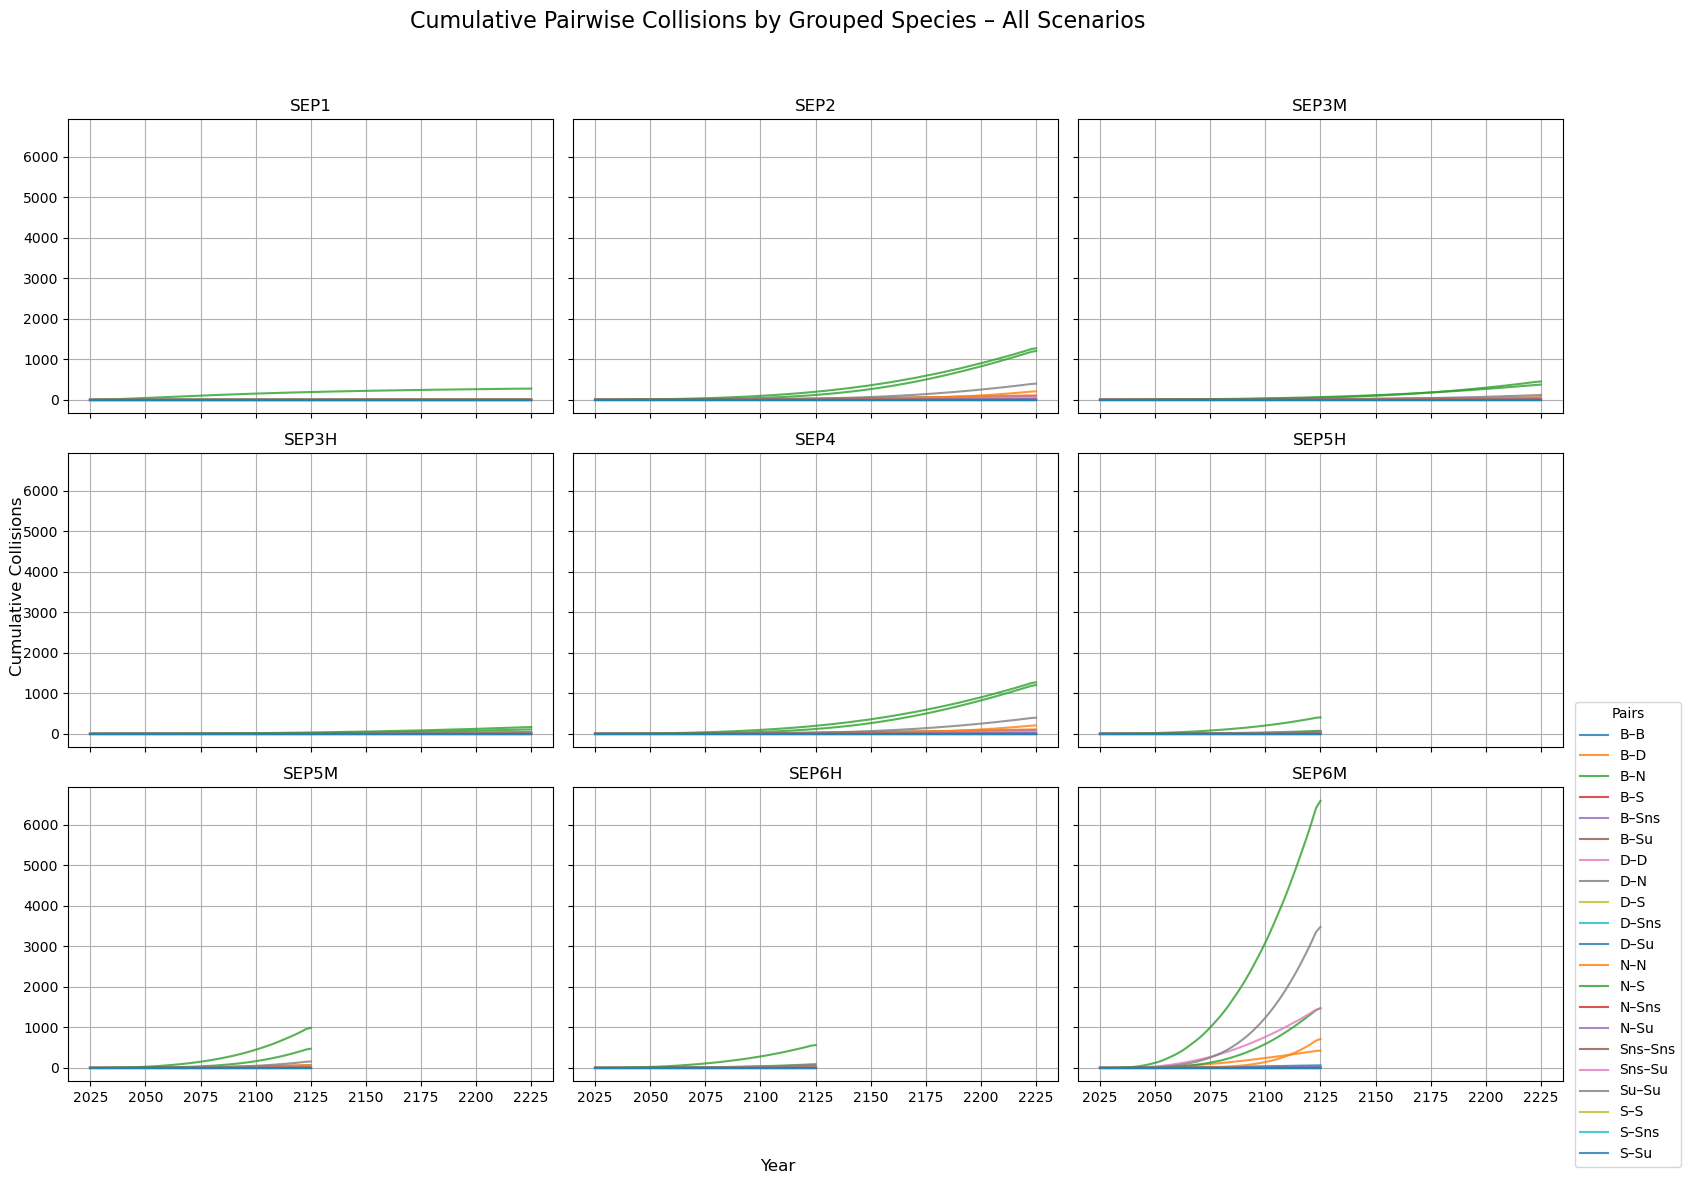

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the layout: 3x3 grid for 9 simulations
n_scenarios = len(scenario_data)
n_cols = 3
n_rows = int(np.ceil(n_scenarios / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 12), sharex=True, sharey=True)
axs = axs.flatten()

for idx, (sim, data) in enumerate(scenario_data.items()):
    df = data["pairwise_collisions"]
    ax = axs[idx]

    if df is not None and not df.empty:
        # Build cumulative time series
        df["Pair"] = df.apply(
            lambda row: f"{min(row['Species 1'], row['Species 2'])}–{max(row['Species 1'], row['Species 2'])}", axis=1
        )
        years = sorted(df["Year"].unique())

        # Compute cumulative collisions per pair
        grouped_ts = {}
        for pair, df_pair in df.groupby("Pair"):
            yearly_sums = df_pair.groupby("Year")["Collisions"].sum()
            full_series = pd.Series(index=years, data=0.0)
            full_series.update(yearly_sums)
            grouped_ts[pair] = full_series.cumsum()

        # Plot
        for pair_key, series in sorted(grouped_ts.items()):
            ax.plot(years, series.values, label=pair_key, alpha=0.8)

        ax.set_title(sim)
        ax.grid(True)
    else:
        ax.set_title(sim + "\n(No Data)")
        ax.axis('off')

# Global labels and layout tweaks
fig.suptitle("Cumulative Pairwise Collisions by Grouped Species – All Scenarios", fontsize=16)
fig.supxlabel("Year")
fig.supylabel("Cumulative Collisions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title="Pairs")
plt.show()